# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv("processed.cleveland.data.csv", 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [8]:
df['target_bin'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
def analise_bivariada(df, var_explicativa, var_resposta):
    
    tab_absoluta = pd.crosstab(df[var_explicativa], df[var_resposta])
    tab_percentual = pd.crosstab(df[var_explicativa], df[var_resposta], normalize='index') * 100

    resultado = tab_absoluta.copy()
    for col in tab_percentual.columns:
        resultado[f"{col}_perc"] = tab_percentual[col]

    return resultado.reset_index()

print("=== Análise: Tipo de dor no peito (cp) ===")
print(analise_bivariada(df, 'cp', 'target_bin'))

print("\n=== Análise: Talassemia (thal) ===")
print(analise_bivariada(df, 'thal', 'target_bin'))

print("\n=== Análise: Inclinação do ST (slope) ===")
print(analise_bivariada(df, 'slope', 'target_bin'))


=== Análise: Tipo de dor no peito (cp) ===
target_bin   cp   0    1     0_perc     1_perc
0           1.0  16    7  69.565217  30.434783
1           2.0  41    9  82.000000  18.000000
2           3.0  68   18  79.069767  20.930233
3           4.0  39  105  27.083333  72.916667

=== Análise: Talassemia (thal) ===
target_bin thal    0   1     0_perc     1_perc
0           3.0  129  37  77.710843  22.289157
1           6.0    6  12  33.333333  66.666667
2           7.0   28  89  23.931624  76.068376
3             ?    1   1  50.000000  50.000000

=== Análise: Inclinação do ST (slope) ===
target_bin  slope    0   1     0_perc     1_perc
0             1.0  106  36  74.647887  25.352113
1             2.0   49  91  35.000000  65.000000
2             3.0    9  12  42.857143  57.142857


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [10]:
def analise_bivariada_continua(df, var_continua, var_resposta, n_grupos=5):

    categorias = pd.qcut(df[var_continua], q=n_grupos, duplicates='drop')

    df_temp = df.copy()
    df_temp['grupo'] = categorias

    tab_absoluta = pd.crosstab(df_temp['grupo'], df_temp[var_resposta])
    tab_percentual = pd.crosstab(df_temp['grupo'], df_temp[var_resposta], normalize='index') * 100

    resultado = tab_absoluta.copy()
    for col in tab_percentual.columns:
        resultado[f"{col}_perc"] = tab_percentual[col]

    return resultado.reset_index()

In [11]:
print("=== Análise bivariada: idade (age) em 5 grupos ===")
print(analise_bivariada_continua(df, 'age', 'target_bin'))

=== Análise bivariada: idade (age) em 5 grupos ===
target_bin           grupo   0   1     0_perc     1_perc
0           (28.999, 45.0]  47  16  74.603175  25.396825
1             (45.0, 53.0]  42  22  65.625000  34.375000
2             (53.0, 58.0]  32  39  45.070423  54.929577
3             (58.0, 62.0]  13  32  28.888889  71.111111
4             (62.0, 77.0]  30  30  50.000000  50.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

if 'target_bin' not in df.columns:
    df['target_bin'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

modelo = smf.logit(formula='target_bin ~ C(sex) + C(cp) + age + trestbps', data=df).fit()

print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             target_bin   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 May 2025   Pseudo R-squ.:                  0.3097
Time:                        16:24:41   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(sex)[T.1.0]     1.

In [15]:
"""- Homens (sex = 1) têm 6 vezes mais chance de ter doença cardíaca do que mulheres.
- Tipo 4 de dor no peito (cp = 4) aumenta o risco em 12 vezes (comparado ao tipo 1).
- Idade: cada ano a mais aumenta o risco em 5.9%.
- Pressão arterial (trestbps): cada ponto a mais aumenta o risco em 1.9%.
- Tipos de dor no peito 2 e 3 não foram significativos."""

'- Homens (sex = 1) têm 6 vezes mais chance de ter doença cardíaca do que mulheres.\n- Tipo 4 de dor no peito (cp = 4) aumenta o risco em 12 vezes (comparado ao tipo 1).\n- Idade: cada ano a mais aumenta o risco em 5.9%.\n- Pressão arterial (trestbps): cada ponto a mais aumenta o risco em 1.9%.\n- Tipos de dor no peito 2 e 3 não foram significativos.'

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

   grupo_prob  prob_pred_mean  event_rate
0           0        0.072008    0.080645
1           1        0.209626    0.152542
2           2        0.435175    0.483871
3           3        0.708861    0.762712
4           4        0.874819    0.819672


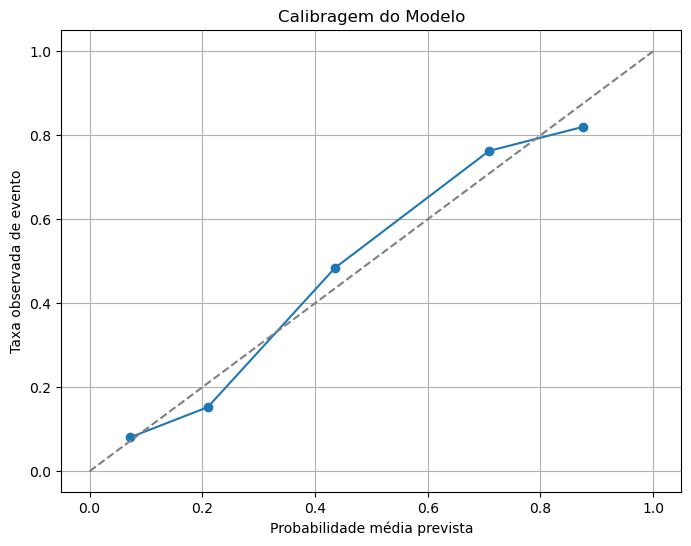

In [16]:
df['prob_pred'] = modelo.predict(df)

df['grupo_prob'] = pd.qcut(df['prob_pred'], q=5, labels=False)

calibragem = df.groupby('grupo_prob').agg(
    prob_pred_mean=('prob_pred', 'mean'),
    event_rate=('target_bin', 'mean')
).reset_index()

print(calibragem)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(calibragem['prob_pred_mean'], calibragem['event_rate'], marker='o', linestyle='-')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Linha de calibragem perfeita
plt.xlabel('Probabilidade média prevista')
plt.ylabel('Taxa observada de evento')
plt.title('Calibragem do Modelo')
plt.grid(True)
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score

df['pred_bin'] = (df['prob_pred'] >= 0.5).astype(int)

acc = accuracy_score(df['target_bin'], df['pred_bin'])

auc = roc_auc_score(df['target_bin'], df['prob_pred'])
gini = 2 * auc - 1

def ks_statistic(y_true, y_scores):
    data = pd.DataFrame({'y_true': y_true, 'y_scores': y_scores})
    data = data.sort_values(by='y_scores', ascending=False)

    data['cum_event'] = np.cumsum(data['y_true']) / data['y_true'].sum()
    data['cum_nonevent'] = np.cumsum(1 - data['y_true']) / (1 - data['y_true']).sum()

    ks = np.max(np.abs(data['cum_event'] - data['cum_nonevent']))
    return ks

ks = ks_statistic(df['target_bin'], df['prob_pred'])

print(f"Acurácia: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Índice Gini: {gini:.4f}")
print(f"Estatística KS: {ks:.4f}")

Acurácia: 0.7954
AUC: 0.8519
Índice Gini: 0.7039
Estatística KS: 0.5930


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [18]:
modelo_novo = smf.logit(formula='target_bin ~ C(sex) + C(cp) + age + trestbps + chol + thalach + C(exang)', data=df).fit()
print(modelo_novo.summary())

df['prob_pred_novo'] = modelo_novo.predict(df)

df['grupo_prob_novo'] = pd.qcut(df['prob_pred_novo'], q=5, labels=False)
calibragem_novo = df.groupby('grupo_prob_novo').agg(
    prob_pred_mean=('prob_pred_novo', 'mean'),
    event_rate=('target_bin', 'mean')
).reset_index()

print(calibragem_novo)

Optimization terminated successfully.
         Current function value: 0.430675
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             target_bin   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Tue, 20 May 2025   Pseudo R-squ.:                  0.3756
Time:                        16:32:42   Log-Likelihood:                -130.49
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.128e-29
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.8919      2.269     -1.715      0.086      -8.340       0.556
C(sex)[T.1.0] 